In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Job_Data.csv'
job_data = pd.read_csv(file_path, delimiter=';')

# Zeige die ersten 10 Zeilen
first_10_rows = job_data.head(10)
print("Erste 10 Zeilen:")
print(first_10_rows)

# Untersuche die Datentypen der Spalten
data_types = job_data.dtypes
print("\nDatentypen der Spalten:")
print(data_types)

# Untersuche fehlende Werte
missing_values = job_data.isnull().sum()
print("\nFehlende Werte:")
print(missing_values)

# Prüfung von eindeutigen Werten in 'job_country', 'job_title_short' und 'salary_rate'
unique_job_country = job_data['job_country'].unique()
unique_job_title_short = job_data['job_title_short'].unique()
unique_salary_rate = job_data['salary_rate'].unique()

print("\nEindeutige Werte in 'job_country':")
print(unique_job_country)

print("\nEindeutige Werte in 'job_title_short':")
print(unique_job_title_short)

print("\nEindeutige Werte in 'salary_rate':")
print(unique_salary_rate)


Erste 10 Zeilen:
             job_title_short  \
0      Senior Data Scientist   
1              Data Engineer   
2        Senior Data Analyst   
3  Machine Learning Engineer   
4             Data Scientist   
5              Data Engineer   
6              Data Engineer   
7       Senior Data Engineer   
8        Senior Data Analyst   
9             Data Scientist   

                                           job_title       job_location  \
0  Senior Data Scientist Data and Analytics Perfo...     Bennington, NE   
1                                 Data Engineer - MA           Mesa, AZ   
2  Supervisory Information Technology Specialist ...     Alexandria, VA   
3                Machine Learning Research Scientist     Pittsburgh, PA   
4                                Data Scientist, AWS         Irving, TX   
5                                      Data Engineer         Tysons, VA   
6                         Sr. Data Engineer (remote)           Anywhere   
7  Senior Data Engineer - Clou

In [3]:
# Konvertieren von 'job_posted_date' zu datetime
job_data['job_posted_date'] = pd.to_datetime(job_data['job_posted_date'], errors='coerce')

# Ersetzung der Kommas in 'salary_hour_avg' und umwandlung in float
job_data['salary_hour_avg'] = job_data['salary_hour_avg'].replace({',': ''}, regex=True)
job_data['salary_hour_avg'] = pd.to_numeric(job_data['salary_hour_avg'], errors='coerce')

# Konvertieren von 'salary_year_avg' zu float
job_data['salary_year_avg'] = pd.to_numeric(job_data['salary_year_avg'], errors='coerce')

# Überprüfen, ob die Konvertierungen erfolgreich waren
print(job_data.dtypes[['job_posted_date', 'salary_hour_avg', 'salary_year_avg']])

job_posted_date    datetime64[ns]
salary_hour_avg           float64
salary_year_avg           float64
dtype: object


In [4]:
# 1. Feature 'is_remote' aus 'job_work_from_home' erstellen
job_data['is_remote'] = job_data['job_work_from_home'].apply(lambda x: True if x == 'TRUE' else False)

# 2. Feature 'salary_bin' basierend auf 'salary_year_avg' erstellen
salary_bins = ['low', 'mid', 'high']
salary_labels = [0, 50000, 100000]  
job_data['salary_bin'] = pd.cut(job_data['salary_year_avg'], bins=[0, 50000, 100000, float('inf')], labels=salary_bins)

# 3. Jahr und Monat aus 'job_posted_date' extrahieren
job_data['posted_year'] = job_data['job_posted_date'].dt.year
job_data['posted_month'] = job_data['job_posted_date'].dt.month

print(job_data.head(10))

             job_title_short  \
0      Senior Data Scientist   
1              Data Engineer   
2        Senior Data Analyst   
3  Machine Learning Engineer   
4             Data Scientist   
5              Data Engineer   
6              Data Engineer   
7       Senior Data Engineer   
8        Senior Data Analyst   
9             Data Scientist   

                                           job_title       job_location  \
0  Senior Data Scientist Data and Analytics Perfo...     Bennington, NE   
1                                 Data Engineer - MA           Mesa, AZ   
2  Supervisory Information Technology Specialist ...     Alexandria, VA   
3                Machine Learning Research Scientist     Pittsburgh, PA   
4                                Data Scientist, AWS         Irving, TX   
5                                      Data Engineer         Tysons, VA   
6                         Sr. Data Engineer (remote)           Anywhere   
7  Senior Data Engineer - Cloud Infrastructure 

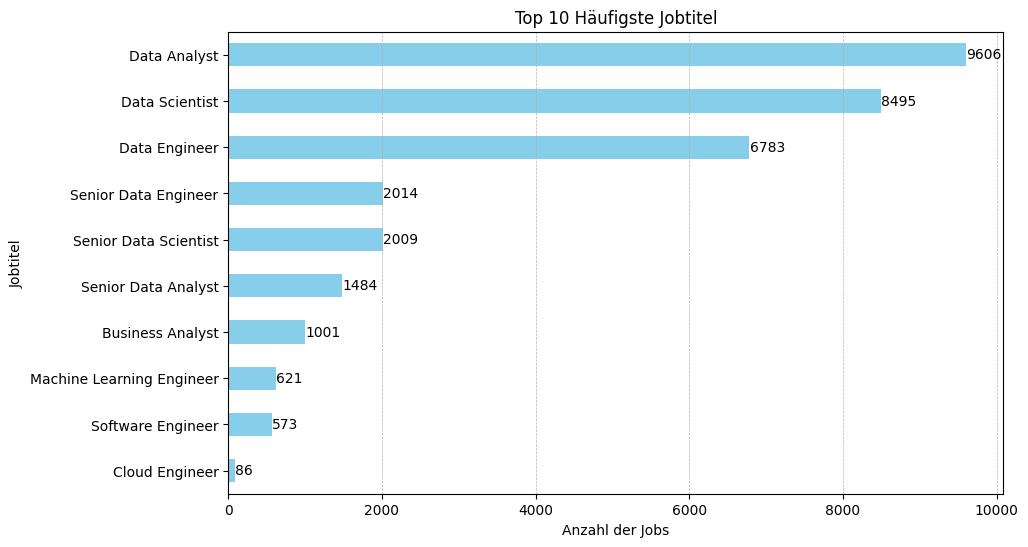

In [5]:
job_title_counts = job_data['job_title_short'].value_counts().head(10)

plt.figure(figsize=(10,6))
job_title_counts.plot(kind='barh', color='skyblue')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5) 
plt.title('Top 10 Häufigste Jobtitel')
plt.xlabel('Anzahl der Jobs')
plt.ylabel('Jobtitel')
plt.gca().invert_yaxis()

# Zahlen am Ende der Balken hinzufügen
for i, v in enumerate(job_title_counts):
    plt.text(v + 0.5, i, str(v), color='black', va='center')

plt.show()

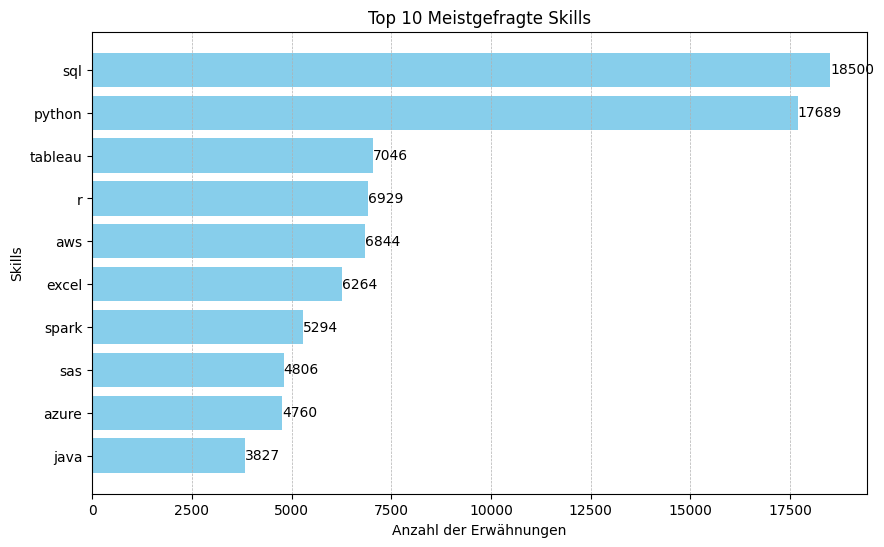

In [7]:
all_skills = []

# Extrahieren der Skills aus der CSV
for skills in job_data['job_skills'].dropna():
    skills_list = skills.strip("[]").replace("'", "").split(", ")
    all_skills.extend(skills_list)

skill_series = pd.Series(all_skills).value_counts().head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(skill_series.index, skill_series.values, color='skyblue')
plt.title('Top 10 Meistgefragte Skills')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5) 
plt.xlabel('Anzahl der Erwähnungen')
plt.ylabel('Skills')
plt.gca().invert_yaxis()

for i, v in enumerate(skill_series.values):
    plt.text(v + 0.5, i, str(v), color='black', va='center')

plt.show()

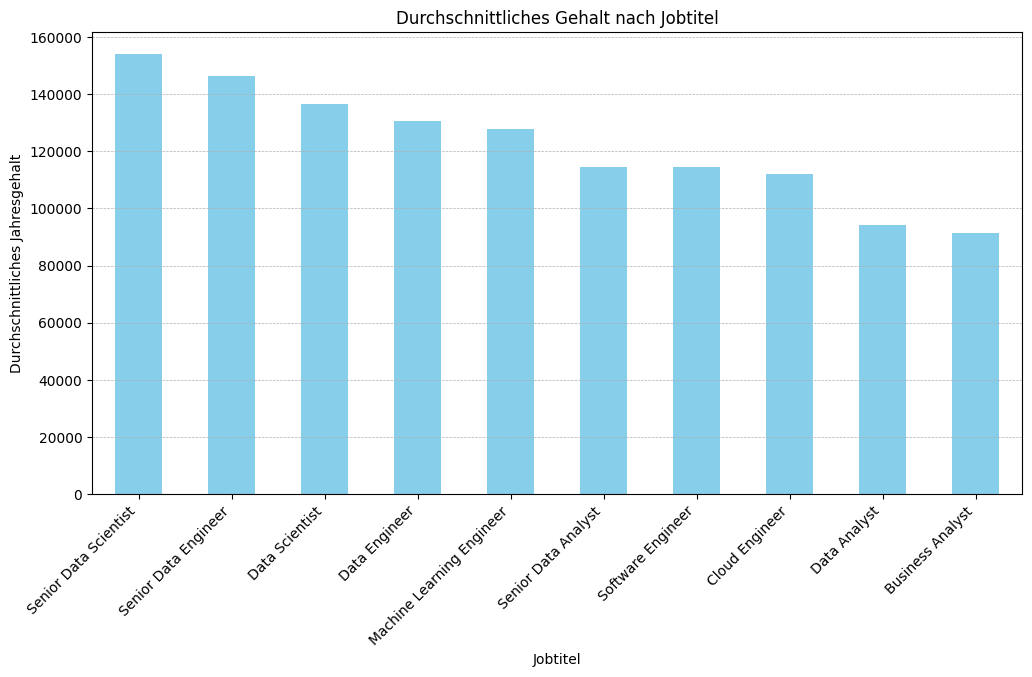

In [8]:
job_data['salary_year_avg'] = pd.to_numeric(job_data['salary_year_avg'], errors='coerce')

plt.figure(figsize=(12,6))
salary_by_job_title = job_data.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).head(10)
salary_by_job_title.plot(kind='bar', color='skyblue') 
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5) 
plt.title('Durchschnittliches Gehalt nach Jobtitel')
plt.xlabel('Jobtitel')
plt.ylabel('Durchschnittliches Jahresgehalt')
plt.xticks(rotation=45, ha='right') 
plt.show()

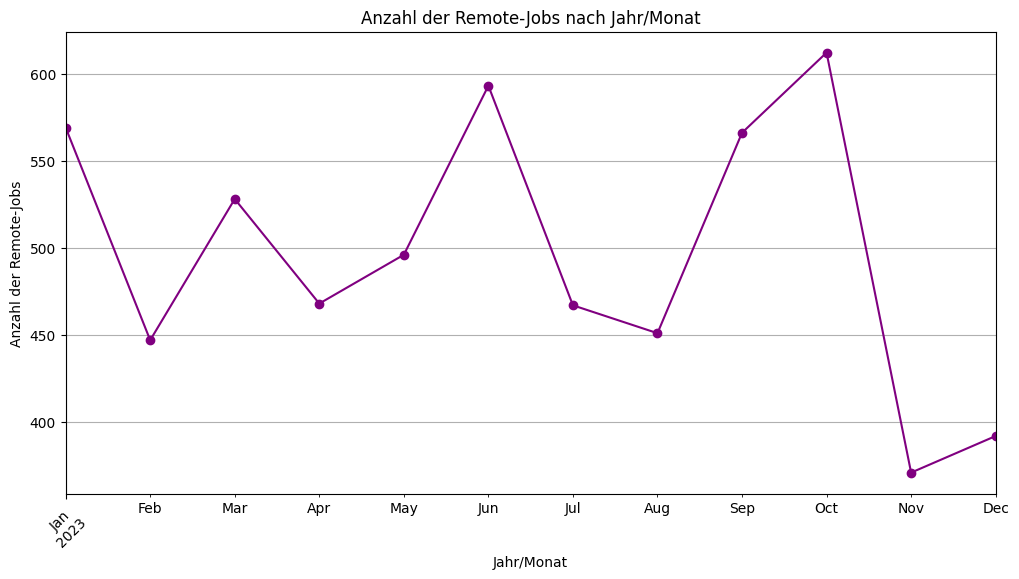

In [9]:
job_data['job_posted_date'] = pd.to_datetime(job_data['job_posted_date'], errors='coerce')
job_data['posted_year_month'] = job_data['job_posted_date'].dt.to_period('M')

job_data['job_work_from_home'] = job_data['job_work_from_home'].astype(str)
job_data['job_work_from_home'] = job_data['job_work_from_home'].str.strip().str.upper()
job_data['is_remote'] = job_data['job_work_from_home'].apply(lambda x: True if x == 'TRUE' else False)

remote_jobs = job_data[job_data['is_remote'] == True].groupby('posted_year_month').size()

plt.figure(figsize=(12,6))
remote_jobs.plot(kind='line', marker='o', color='purple')
plt.title('Anzahl der Remote-Jobs nach Jahr/Monat')
plt.xlabel('Jahr/Monat')
plt.ylabel('Anzahl der Remote-Jobs')
plt.xticks(rotation=45) 
plt.grid(True) 
plt.show()


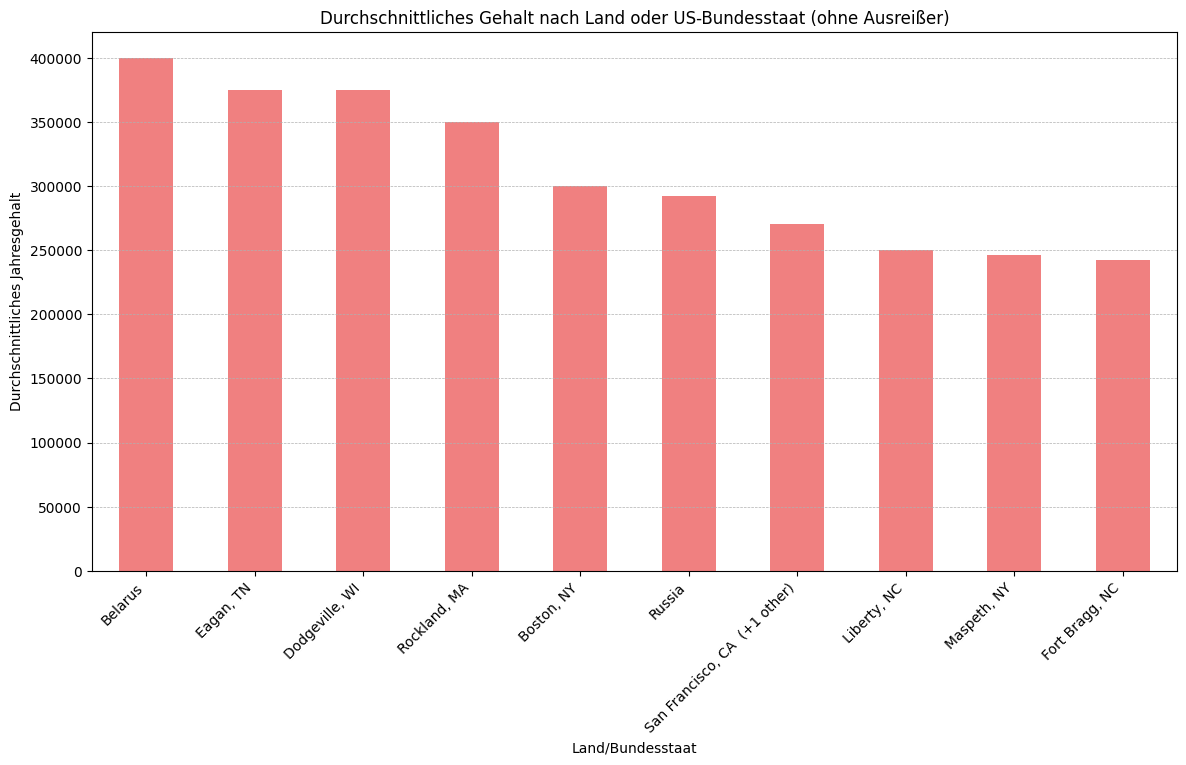

In [ ]:
job_data_clean = job_data.copy()
job_data_clean['salary_year_avg'] = pd.to_numeric(job_data_clean['salary_year_avg'], errors='coerce')
job_data_clean = job_data_clean.dropna(subset=['salary_year_avg'])
job_data_clean_no_outliers = job_data_clean[job_data_clean['salary_year_avg'] <= 500000]

plt.figure(figsize=(14,7))
salary_by_location = job_data_clean_no_outliers.groupby('job_location')['salary_year_avg'].mean().sort_values(ascending=False).head(10)
salary_by_location.plot(kind='bar', color='lightcoral')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Durchschnittliches Gehalt nach Land oder US-Bundesstaat (ohne Ausreißer)')
plt.xlabel('Land/Bundesstaat')
plt.ylabel('Durchschnittliches Jahresgehalt')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()


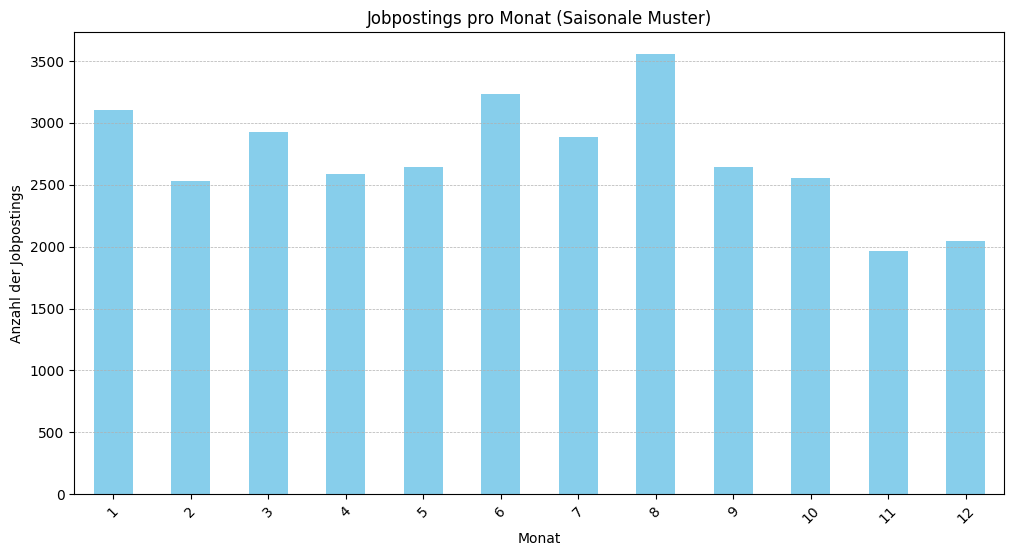

In [13]:
monthly_postings = job_data.groupby(job_data['job_posted_date'].dt.month).size()

plt.figure(figsize=(12,6))
monthly_postings.plot(kind='bar', color='skyblue')
plt.title('Jobpostings pro Monat (Saisonale Muster)')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Jobpostings')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5) 
plt.show()

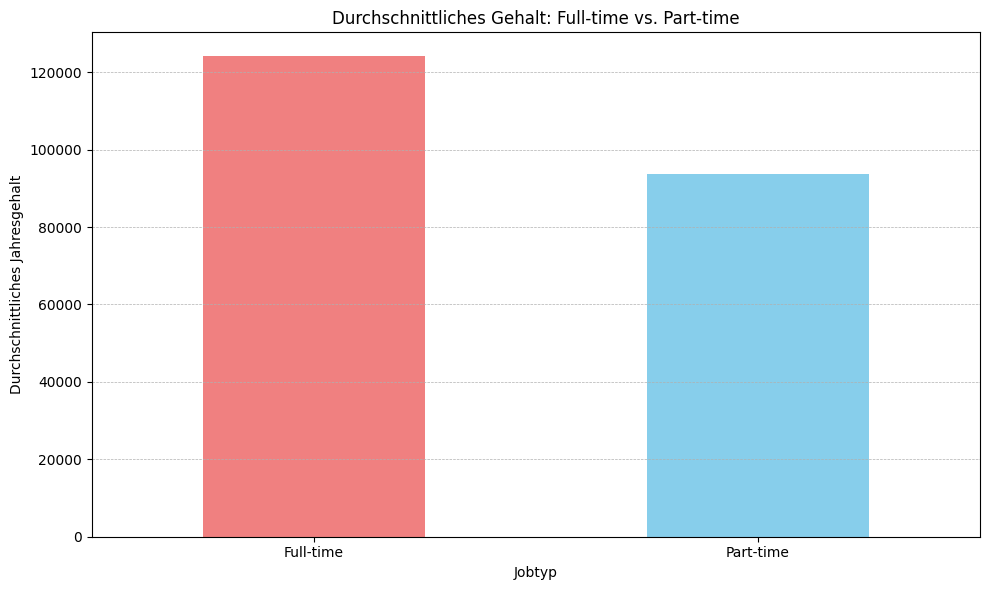

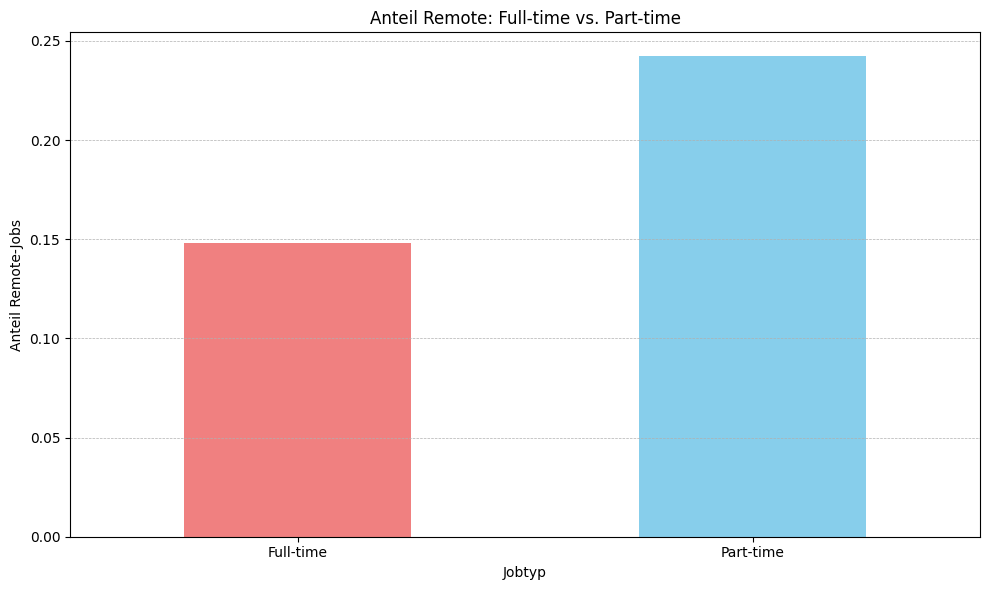

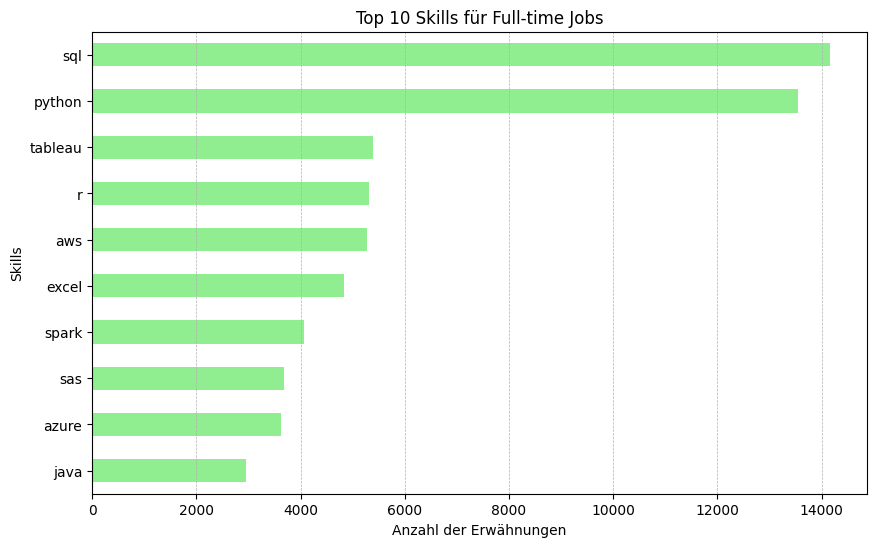

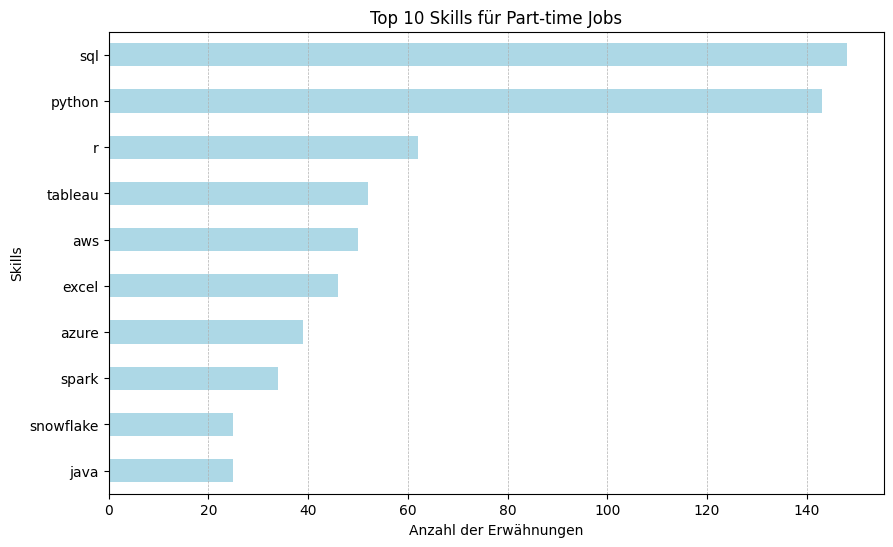

In [14]:
# 1. Durchschnittsgehalt für Full-time vs. Part-time
salary_by_schedule = job_data.groupby('job_schedule_type')['salary_year_avg'].mean()

# 2. Anteil Remote für Full-time vs. Part-time
remote_by_schedule = job_data.groupby('job_schedule_type')['is_remote'].mean()

# 3. Top Skills für Full-time vs. Part-time
top_skills_full_time = []
top_skills_part_time = []

for skills, schedule in zip(job_data['job_skills'].dropna(), job_data['job_schedule_type']):
    if isinstance(skills, str):
        skills_list = skills.strip("[]").replace("'", "").split(", ")
        if schedule == 'Full-time':
            top_skills_full_time.extend(skills_list)
        elif schedule == 'Part-time':
            top_skills_part_time.extend(skills_list)

top_skills_full_time = pd.Series(top_skills_full_time).value_counts().head(10)
top_skills_part_time = pd.Series(top_skills_part_time).value_counts().head(10)

# Visualisierungen

# 1. Durchschnittsgehalt für Full-time vs. Part-time
salary_by_schedule = job_data[job_data['job_schedule_type'].isin(['Full-time', 'Part-time'])] \
     .groupby('job_schedule_type')['salary_year_avg'].mean()

plt.figure(figsize=(10,6))

salary_by_schedule.plot(kind='bar', color=['lightcoral', 'skyblue'])

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.title('Durchschnittliches Gehalt: Full-time vs. Part-time')
plt.xlabel('Jobtyp')
plt.ylabel('Durchschnittliches Jahresgehalt')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 2. Anteil Remote
remote_by_schedule = job_data[job_data['job_schedule_type'].isin(['Full-time', 'Part-time'])] \
     .groupby('job_schedule_type')['is_remote'].mean()

plt.figure(figsize=(10,6))

remote_by_schedule.plot(kind='bar', color=['lightcoral', 'skyblue'])

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.title('Anteil Remote: Full-time vs. Part-time')
plt.xlabel('Jobtyp')
plt.ylabel('Anteil Remote-Jobs')
plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()


# 3. Top Skills
# Full-time Skills
plt.figure(figsize=(10,6))
top_skills_full_time.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Skills für Full-time Jobs')
plt.xlabel('Anzahl der Erwähnungen')
plt.ylabel('Skills')
plt.gca().invert_yaxis()
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5) 
plt.show()

# Part-time Skills
plt.figure(figsize=(10,6))
top_skills_part_time.plot(kind='barh', color='lightblue')
plt.title('Top 10 Skills für Part-time Jobs')
plt.xlabel('Anzahl der Erwähnungen')
plt.ylabel('Skills')
plt.gca().invert_yaxis()
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5) 
plt.show()

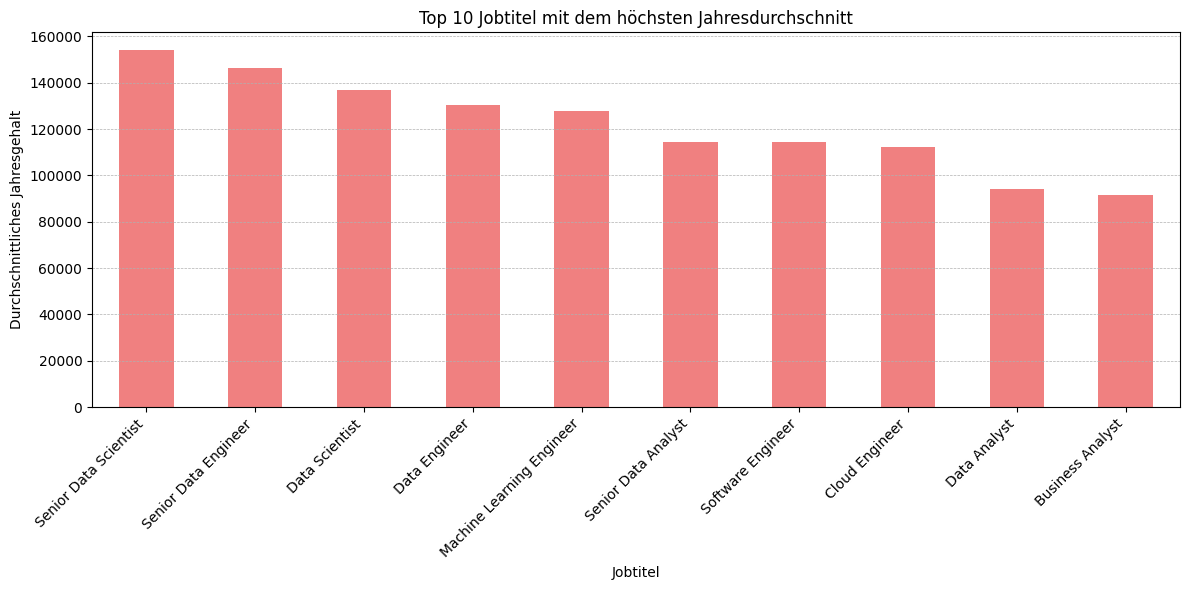

In [15]:
# 1. Jobtitel mit dem höchsten Jahresdurchschnitt
salary_by_job_title = job_data.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

# Visualisierung der Jobtitel mit den höchsten Gehältern
plt.figure(figsize=(12,6))
salary_by_job_title.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Jobtitel mit dem höchsten Jahresdurchschnitt')
plt.xlabel('Jobtitel')
plt.ylabel('Durchschnittliches Jahresgehalt')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5) 
plt.show()

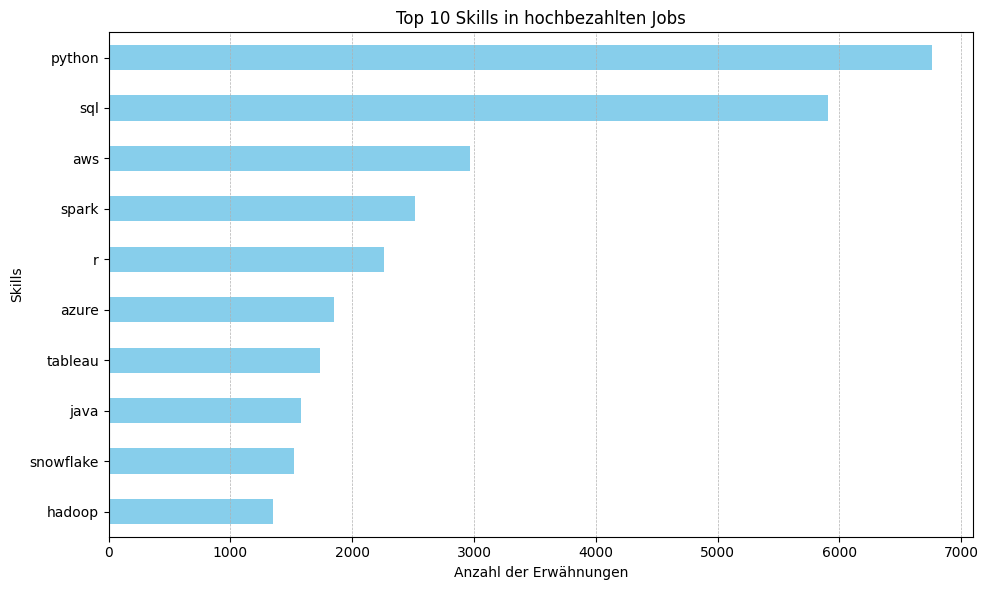

In [16]:
# 2. Welche Skills sind mit hohen Gehältern verbunden?
high_salary_jobs = job_data[job_data['salary_year_avg'] > job_data['salary_year_avg'].mean()]

# Extrahiere die Skills aus den hochbezahlten Jobs
high_salary_skills = []

for skills, salary in zip(high_salary_jobs['job_skills'], high_salary_jobs['salary_year_avg']):
    if isinstance(skills, str):  # Stelle sicher, dass 'skills' ein String ist
        skills_list = skills.strip("[]").replace("'", "").split(", ")
        high_salary_skills.extend(skills_list)

# Zähle die häufigsten Skills in hochbezahlten Jobs
high_salary_skills_series = pd.Series(high_salary_skills).value_counts().head(10)

# Visualisierung der meistgefragten Skills in hochbezahlten Jobs
plt.figure(figsize=(10,6))
high_salary_skills_series.plot(kind='barh', color='skyblue')
plt.title('Top 10 Skills in hochbezahlten Jobs')
plt.xlabel('Anzahl der Erwähnungen')
plt.ylabel('Skills')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5) 
plt.show()

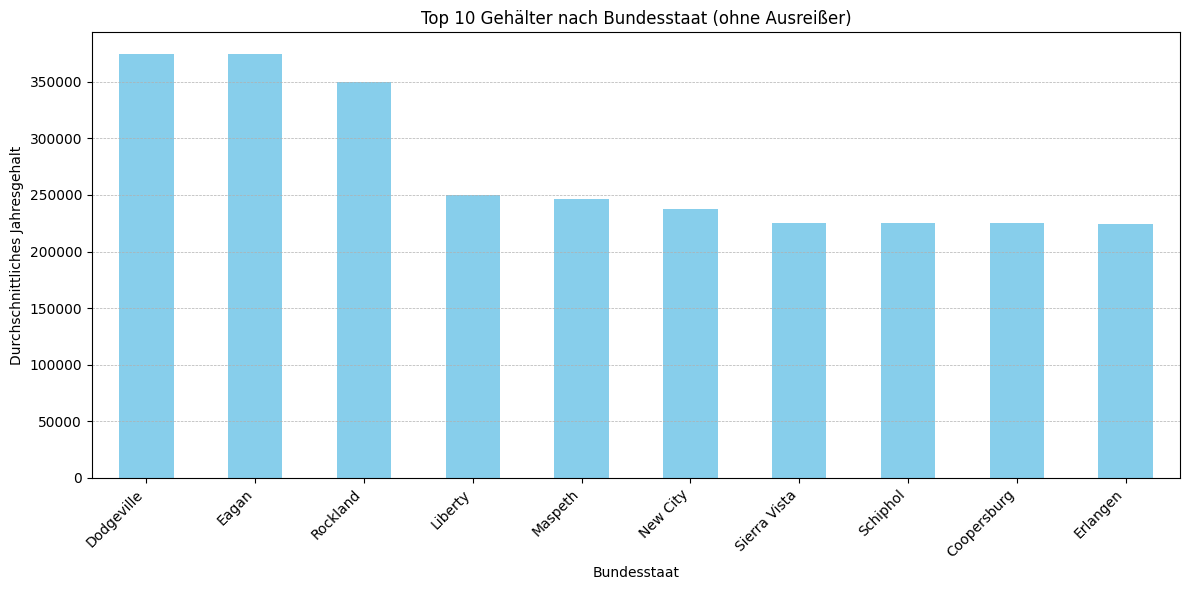

In [17]:
job_data['state'] = job_data['job_location'].str.split(',').str[-2].str.strip()
job_data_clean = job_data[job_data['salary_year_avg'] <= 500000]
salary_by_state = job_data_clean.groupby('state')['salary_year_avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
salary_by_state.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Gehälter nach Bundesstaat (ohne Ausreißer)')
plt.xlabel('Bundesstaat')
plt.ylabel('Durchschnittliches Jahresgehalt')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5) 
plt.show()